In [2]:
import data_prep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime

In [3]:
# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
start = now.strftime("%d-%m-%Y %H:%M:%S")
print(start)

26-06-2022 19:48:16


In [57]:
df, frequency, forecast_horizon, missing_values, equal_len = data_prep.convert_tsf_to_dataframe('datasets/m3_monthly_dataset.tsf')
df.head()

,series_name,start_timestamp,series_value
0,T1,1990-01-01,"[2640.0, 2640.0, 2160.0, 4200.0, 3360.0, 2400...."
1,T2,1990-01-01,"[1680.0, 1920.0, 120.0, 1080.0, 840.0, 1440.0,..."
2,T3,1990-01-01,"[1140.0, 720.0, 4860.0, 1200.0, 3150.0, 2130.0..."
3,T4,1990-01-01,"[180.0, 940.0, 2040.0, 800.0, 1000.0, 520.0, 5..."
4,T5,1990-01-01,"[2000.0, 1550.0, 4450.0, 3050.0, 3050.0, 2250...."


In [58]:
print(len(df), frequency, forecast_horizon, missing_values, equal_len)

1428 monthly 18 False False


In [59]:
arr = df.values
arr = arr.T
d = {i: list(a) for i, a in enumerate(arr[2])}


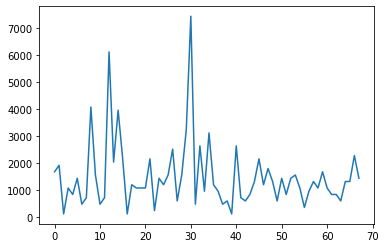

In [69]:
ls = d[1]
plt.plot(ls)
plt.show()

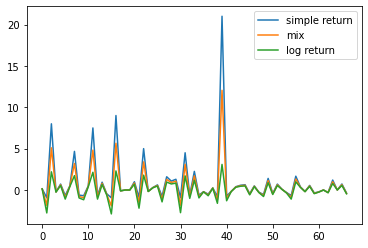

[1.1494989343464272, 3.1882663616451445, 2.0512705205256645]
[ 1.3213478  10.16504239  4.20771075]


In [73]:
def simple_return(ls) -> ls:
    res = []
    for i, s in enumerate(ls):
        if i == 0: continue
        res.append((s - ls[i-1])/ls[i-1])
    return res

log_return = np.diff(np.log(ls))
simp_return = simple_return(ls)
mix = [np.mean([l, s]) for l, s in zip(log_return, simp_return)]


plt.plot(simp_return, label='simple return')
plt.plot(mix, label='mix')
plt.plot(log_return, label='log return')
plt.legend()
plt.show()
sigma = list(map(np.std, [log_return, simp_return, mix]))
print(sigma)
var = np.square(sigma)
print(var)

In [88]:
import json
"""
with open("../datasets/m3_monthly_dataset.json", "w") as outfile:
    json.dump(d, outfile)

with open('runs.json', 'r') as file:
    ran = json.load(file)

new_run = {
    'something': 1,
    'something else': {
        'yess': [1, 2],
        '0': 1
    }
}
ran.append(new_run)
with open('runs.json', 'w') as file:
    json.dump(ran, file)
"""

In [10]:
import json
import os
"""
# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
start = now.strftime("%d-%m-%Y_%H:%M:%S")

isExist = os.path.exists(f'{start}/')

if not isExist:
    os.mkdir(f'{start}/')

d1 = {'1': 1, '2': 2}

with open(f'{start}/d1.json', 'x') as file:
    json.dump(d1, file, indent=4)
"""

In [55]:
d1 = {'1': 1, '2': 2}
d2 = {'1': 1, '2': 2}
len(d2)

2

In [18]:
l = []
l.append(4)
l.append(5)
k = []
k.append(np.mean(l))
k

[4.5]

In [41]:
import itertools

h = {
    '1': [1, 2, 3],
    '2': [(1, ), (1, 2), (1, 2, 3)]
}

tre = [0.1, 0.2, 0.3]

tres = list(itertools.product(tre, tre))

k = [(0.1, 0.2), (0.3, 0.4), (0.5, 0.6)]

nl = [7, 8, 9]

hs = [
    {
        'thres': hkk[0],
        'mhyper 1': hkk[1],
        'mhyper 2': hkk[2],
        'nllll': hkk[3]
    } for hkk in itertools.product(tres, *h.values(), nl)]
pprint(hs)

[{'mhyper 1': 1, 'mhyper 2': (1,), 'nllll': 7, 'thres': (0.1, 0.1)},
 {'mhyper 1': 1, 'mhyper 2': (1,), 'nllll': 8, 'thres': (0.1, 0.1)},
 {'mhyper 1': 1, 'mhyper 2': (1,), 'nllll': 9, 'thres': (0.1, 0.1)},
 {'mhyper 1': 1, 'mhyper 2': (1, 2), 'nllll': 7, 'thres': (0.1, 0.1)},
 {'mhyper 1': 1, 'mhyper 2': (1, 2), 'nllll': 8, 'thres': (0.1, 0.1)},
 {'mhyper 1': 1, 'mhyper 2': (1, 2), 'nllll': 9, 'thres': (0.1, 0.1)},
 {'mhyper 1': 1, 'mhyper 2': (1, 2, 3), 'nllll': 7, 'thres': (0.1, 0.1)},
 {'mhyper 1': 1, 'mhyper 2': (1, 2, 3), 'nllll': 8, 'thres': (0.1, 0.1)},
 {'mhyper 1': 1, 'mhyper 2': (1, 2, 3), 'nllll': 9, 'thres': (0.1, 0.1)},
 {'mhyper 1': 2, 'mhyper 2': (1,), 'nllll': 7, 'thres': (0.1, 0.1)},
 {'mhyper 1': 2, 'mhyper 2': (1,), 'nllll': 8, 'thres': (0.1, 0.1)},
 {'mhyper 1': 2, 'mhyper 2': (1,), 'nllll': 9, 'thres': (0.1, 0.1)},
 {'mhyper 1': 2, 'mhyper 2': (1, 2), 'nllll': 7, 'thres': (0.1, 0.1)},
 {'mhyper 1': 2, 'mhyper 2': (1, 2), 'nllll': 8, 'thres': (0.1, 0.1)},
 {'mhyper

In [44]:
nl = [{j: i for j in range(3)} for i in range(5)]

b = nl[1]
t = nl[0]

del b[1]
print(b, t)

{0: 1, 2: 1} {0: 0, 1: 0, 2: 0}


In [7]:
print(hs[0])
print(hs[0][0][0], hs[0][0][1])
print(hs[0][1:])

((0.1, 0.1), 1, (1,))
0.1 0.1
(1, (1,))


In [52]:
v = 0.5
t = '_3'
type(t) != int and type(t) != float

True

In [54]:
print((10-1)/10, np.diff(np.log([1, 10])))

0.9 [2.30258509]


In [6]:
def give_np(l):
    return np.array(l)

a = give_np([1,2,3]).tolist()[1]
print(type(a))

<class 'int'>


# validation, test demo

In [4]:
ts = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

n_val = 3
n_test = 3
n_lag = 3
h = 1

split = n_val + n_test

for i in range(n_val):
    train_v = ts[:-split+1+i]
    train = train_v[:-h]
    val = train_v[-h:]
    ttrain = [t*0.9 for t in train] # transformation
    # ttrain = train
    tX, ty = data_prep.ts_prep(ttrain, nlag=n_lag, horizon=h)
    ttrainx, tvalx = tX, ttrain[-n_lag:]
    ttrainy, valy = ty, val

    pprint(ttrainx)
    pprint(ttrainy)
    pprint(tvalx)
    pprint(valy)
    print(train)


array([[0.9, 1.8, 2.7],
       [1.8, 2.7, 3.6],
       [2.7, 3.6, 4.5],
       [3.6, 4.5, 5.4]])
array([[3.6],
       [4.5],
       [5.4],
       [6.3]])
[4.5, 5.4, 6.3]
[8]
[1, 2, 3, 4, 5, 6, 7]
array([[0.9, 1.8, 2.7],
       [1.8, 2.7, 3.6],
       [2.7, 3.6, 4.5],
       [3.6, 4.5, 5.4],
       [4.5, 5.4, 6.3]])
array([[3.6],
       [4.5],
       [5.4],
       [6.3],
       [7.2]])
[5.4, 6.3, 7.2]
[9]
[1, 2, 3, 4, 5, 6, 7, 8]
array([[0.9, 1.8, 2.7],
       [1.8, 2.7, 3.6],
       [2.7, 3.6, 4.5],
       [3.6, 4.5, 5.4],
       [4.5, 5.4, 6.3],
       [5.4, 6.3, 7.2]])
array([[3.6],
       [4.5],
       [5.4],
       [6.3],
       [7.2],
       [8.1]])
[6.3, 7.2, 8.1]
[10]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [13]:
for i in range(n_test):
    if i == n_test-1:
        train = ts
    else:
        train = ts[:-n_test+1+i]

    # ttrain = [t*0.9 for t in train] # transformation
    tX, ty = data_prep.ts_prep(train, nlag=n_lag, horizon=h)
    ttrainx, ttestx = tX[:-1], tX[-1]
    ttrainy, testy = ty[:-1], train[-h]

    pprint(ttrainx)
    pprint(ttrainy)
    pprint(ttestx)
    pprint(testy)
    print(train)

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])
array([[ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])
array([ 8,  9, 10])
11
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
array([[ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10]])
array([[ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])
array([ 9, 10, 11])
12
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
array([[ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11]])
array([[ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])
array([10, 11, 12])
13
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [64]:
l = []
k = 1
for i in range(3):
    l1 = []
    for j in range(4):
        l1.append(k)
        k +=1
    l.append(l1)

l

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]

In [65]:
l = np.array(l)
l

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [70]:
min(np.minimum(*l))

1

In [75]:
measure = {'SAPE': lambda y, y_hat: np.abs(y_hat-y)/np.mean((np.abs(y_hat), np.abs(y)))}

k = np.array([10])[0]
measure['SAPE'](9, k)

0.10526315789473684

In [34]:
from tqdm import trange, tqdm

for i in trange(5, desc='run'):
    print(i)

run: 100%|██████████| 5/5 [00:00<00:00, 12787.51it/s]

0
1
2
3
4


In [36]:
d1 = {i: 2*i for i in range(10)}

for k, v in tqdm(d1.items(), desc='test 2'):
    print(k, v)

test 2: 100%|██████████| 10/10 [00:00<00:00, 2379.21it/s]

0 0
1 2
2 4
3 6
4 8
5 10
6 12
7 14
8 16
9 18


In [39]:
n = 5

type(n) == list

False